# WK-cities Dataset

## Property characteristics only

### Data import and drop unnecessary columns

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
#prevent SettingWithCopyWarning message from appearing
pd.options.mode.chained_assignment = None

wk_cities = pd.read_csv('./Data/WK_cities.csv', dtype={'plz': object, 'zimmeranzahl': object, 'click_customer': object})

df_wk_cities = pd.DataFrame(wk_cities)

#All columns sorted by category
#Independent and dependent variabels, columns which will not be dropped: edat, zimmeranzahl, schlafzimmer, badezimmer, wohnflaeche, grundstuecksflaeche, objektzustand, parkplatz, price_sqm, kaufpreis
time_information = ['adat']
object_features = ['ausstattung', 'balkon', 'denkmalobjekt', 'einbaukueche', 'etage', 'gaestewc', 'garten', 'haustier_erlaubt', 'kategorie_Wohnung', 'keller']
general_object_information = ['anzahletagen', 'bauphase', 'einliegerwohnung', 'immobilientyp', 'nebenraeume', 'rollstuhlgerecht', 'wohngeld']
area_information = ['grundstuecksflaeche', 'nutzflaeche']
energy_and_structure_information = ['energieausweistyp', 'ev_kennwert', 'ev_wwenthalten', 'heizkosten', 'heizungsart', 'letzte_modernisierung']
price_information = ['parkplatzpreis']
regional_information = ['gid2019', 'kid2019', 'ergg_1km', 'blid']
meta_information_advertisement = ['click_customer', 'click_schnellkontakte', 'click_url', 'click_weitersagen', 'hits', 'laufzeittage', 'hits_gen']
technical_variables = ['bef1', 'bef2', 'bef3', 'bef4', 'bef5', 'bef6', 'bef7', 'bef8', 'bef9', 'bef10', 'anbieter', 'duplicateid', 'spell', 'click_schnellkontakte_gen', 'click_weitersagen_gen', 'click_url_gen']
other_variables = ['liste_show', 'liste_match', 'liste_show_gen', 'liste_match_gen']

columns_to_drop = time_information + object_features + general_object_information + area_information + energy_and_structure_information + price_information + regional_information + meta_information_advertisement + technical_variables + other_variables
df_wk_cities.drop(columns=columns_to_drop, axis=1, inplace=True)

print(df_wk_cities.shape)
df_wk_cities.describe(include='all')

(927319, 14)


,obid,plz,kaufpreis,baujahr,wohnflaeche,zimmeranzahl,schlafzimmer,badezimmer,aufzug,parkplatz,energieeffizienzklasse,objektzustand,edat,price_sqm
count,9.273190e+05,927319,9.273190e+05,793327.000000,927319.000000,927319,927319,927319,927319,927319,927319,927319,927319,927319.000000
unique,NaN,2317,NaN,NaN,NaN,44,18,8,3,3,10,11,192,NaN
top,NaN,10245,NaN,NaN,NaN,3,Other missing,1,No,Other missing,Not specified,Not specified,2022m12,NaN
freq,NaN,5888,NaN,NaN,NaN,313604,361803,513075,393133,692545,860373,266277,10767,NaN
mean,8.222709e+07,NaN,2.942670e+05,1970.057329,83.275360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3428.995769
std,2.903465e+07,NaN,2.382443e+05,38.522585,33.938178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2180.835325
min,6.745100e+06,NaN,1.610000e+04,1500.000000,24.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,397.826080
25%,5.744410e+07,NaN,1.210000e+05,1954.000000,59.090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1778.947400
50%,7.736723e+07,NaN,2.290000e+05,1973.000000,77.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2911.504400
75%,1.072567e+08,NaN,3.950000e+05,2002.000000,101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4500.000000


### Data Cleaning of relevant columns

In [10]:
df_wk_cities['edat_year'] = df_wk_cities['edat'].astype(str).str[:4]
df_wk_cities['edat_year'] = pd.to_numeric(df_wk_cities['edat_year'])

df_original = df_wk_cities.copy(deep=True)

df_characteristics = df_original[df_original['baujahr'].notna()]
df_characteristics['age'] = df_characteristics['edat_year'] - df_characteristics['baujahr']

df_characteristics = df_characteristics[df_characteristics['zimmeranzahl'].notna()]
df_characteristics = df_characteristics[~df_characteristics['zimmeranzahl'].str.contains("Implausible value")]
df_characteristics['zimmeranzahl'] = pd.to_numeric(df_characteristics['zimmeranzahl'])
df_characteristics = df_characteristics[(df_characteristics['zimmeranzahl'] > 0) & (df_characteristics['zimmeranzahl'] < 30)]

df_characteristics = df_characteristics[df_characteristics['schlafzimmer'].notna()]
df_characteristics = df_characteristics[~df_characteristics['schlafzimmer'].str.contains("Other missing")]
df_characteristics = df_characteristics[~df_characteristics['schlafzimmer'].str.contains("Implausible value")]
df_characteristics['schlafzimmer'] = pd.to_numeric(df_characteristics['schlafzimmer'])
df_characteristics = df_characteristics[(df_characteristics['schlafzimmer'] > 0) & (df_characteristics['schlafzimmer'] < 15)]

df_characteristics = df_characteristics[df_characteristics['badezimmer'].notna()]
df_characteristics = df_characteristics[~df_characteristics['badezimmer'].str.contains("Other missing")]
df_characteristics = df_characteristics[~df_characteristics['badezimmer'].str.contains("Implausible value")]
df_characteristics['badezimmer'] = pd.to_numeric(df_characteristics['badezimmer'])
df_characteristics = df_characteristics[(df_characteristics['badezimmer'] > 0) & (df_characteristics['badezimmer'] < 15)]

df_characteristics = df_characteristics[df_characteristics['wohnflaeche'].notna()]
df_characteristics['wohnflaeche'] = pd.to_numeric(df_characteristics['wohnflaeche'])
df_characteristics = df_characteristics[(df_characteristics['wohnflaeche'] > 0) & (df_characteristics['wohnflaeche'] < 5000)]

df_characteristics = df_characteristics[~df_characteristics['objektzustand'].str.contains("Not specified")]
df_characteristics = df_characteristics[~df_characteristics['objektzustand'].str.contains("By arrangement")]
#df_characteristics['objektzustand'] = df_characteristics['objektzustand'].astype('category')
#df_characteristics['objektzustand'] = df_characteristics['objektzustand'].cat.reorder_categories(['Dilapidated', 'Needs renovation', 'Well kempt', 'Modernised', 'Reconstructed', 'Completely renovated', 'Like new', 'First occupancy after reconstruction', 'First occupancy'], ordered=True)
#df_characteristics['objektzustand'] = df_characteristics['objektzustand'].cat.codes
df_characteristics = df_characteristics.replace(['Needs renovation', 'Well kempt', 'Completely renovated', 'Like new', 'First occupancy after reconstruction', 'First occupancy'], ['Needs_renovation', 'Well_kempt', 'Completely_renovated', 'Like_new', 'First_occupancy_after_reconstruction', 'First_occupancy'])
df_characteristics = pd.get_dummies(df_characteristics, columns=['objektzustand'], prefix=['Objektzustand'])

df_characteristics = df_characteristics[~df_characteristics['aufzug'].str.contains("Other missing")]
df_characteristics['aufzug'] = df_characteristics['aufzug'].astype('category')
df_characteristics['aufzug'] = df_characteristics['aufzug'].cat.reorder_categories(['No', 'Yes'], ordered=True)
df_characteristics['aufzug'] = df_characteristics['aufzug'].cat.codes

#df_characteristics = df_characteristics[~df_characteristics['energieeffizienzklasse'].str.contains("Not specified")]
#df_characteristics['energieeffizienzklasse'] = df_characteristics['energieeffizienzklasse'].astype('category')
#df_characteristics['energieeffizienzklasse'] = df_characteristics['energieeffizienzklasse'].cat.reorder_categories(['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A', 'APLUS'], ordered=True)
#df_characteristics['energieeffizienzklasse'] = df_characteristics['energieeffizienzklasse'].cat.codes

print(df_characteristics.shape)
df_characteristics.head()

(364240, 24)


,obid,plz,kaufpreis,baujahr,wohnflaeche,zimmeranzahl,schlafzimmer,badezimmer,aufzug,parkplatz,...,age,Objektzustand_Completely_renovated,Objektzustand_Dilapidated,Objektzustand_First_occupancy,Objektzustand_First_occupancy_after_reconstruction,Objektzustand_Like_new,Objektzustand_Modernised,Objektzustand_Needs_renovation,Objektzustand_Reconstructed,Objektzustand_Well_kempt
0,43723127,22145,77000.0,1970.0,45.0,2.0,1,1,1,Yes,...,37.0,0,0,1,0,0,0,0,0,0
8,41261600,22119,95000.0,1960.0,34.0,2.0,1,1,1,Yes,...,47.0,0,0,0,0,0,1,0,0,0
19,41801997,22529,195000.0,2008.0,107.0,3.0,2,1,0,Yes,...,-1.0,0,0,1,0,0,0,0,0,0
33,40446111,22761,159000.0,1999.0,71.0,2.0,1,1,1,Other missing,...,8.0,0,0,0,0,0,0,0,0,1
46,39978694,22359,272100.0,2006.0,95.0,3.0,2,1,1,Yes,...,1.0,0,0,1,0,0,0,0,0,0


### Overview of the sample

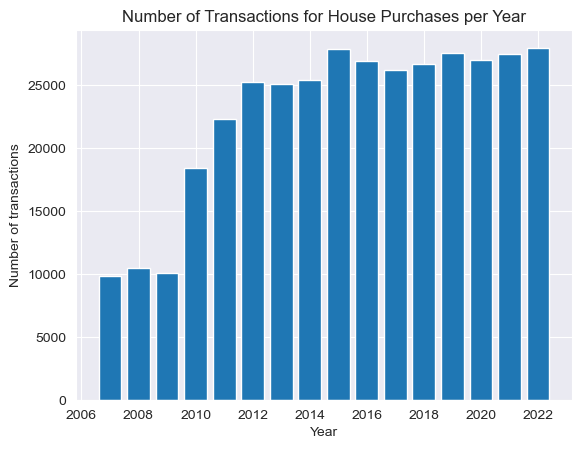

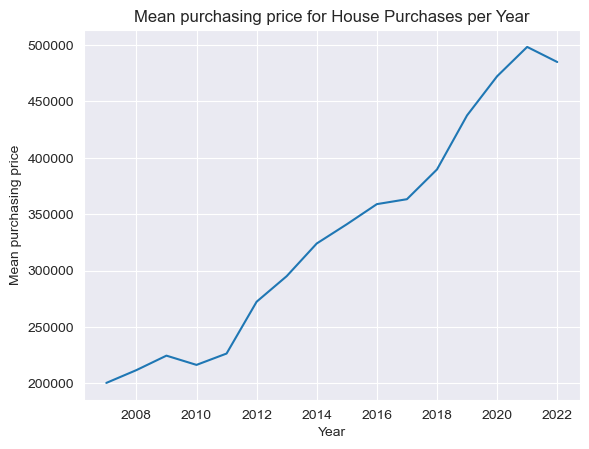

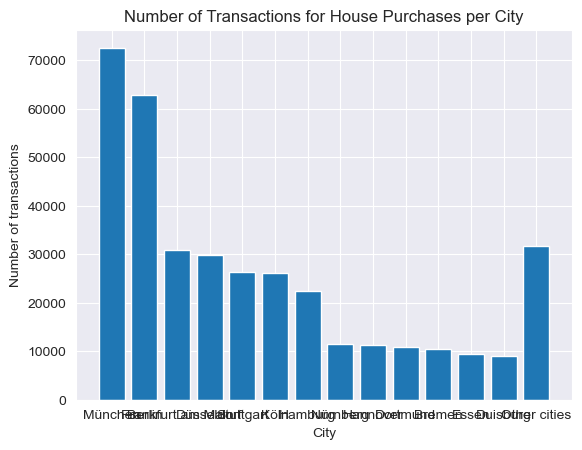

In [11]:
df_data_overview = df_characteristics.copy(deep=True)
number_of_transactions_per_year = df_data_overview.groupby('edat_year')['price_sqm'].count()
plt.bar(number_of_transactions_per_year.index, number_of_transactions_per_year.values)
plt.xlabel("Year")
plt.ylabel('Number of transactions')
plt.title('Number of Transactions for House Purchases per Year')
plt.show()

average_price_sqm_per_year = df_data_overview.groupby('edat_year')['kaufpreis'].mean()
plt.plot(average_price_sqm_per_year.index, average_price_sqm_per_year.values)
plt.xlabel("Year")
plt.ylabel('Mean purchasing price')
plt.title('Mean purchasing price for House Purchases per Year')
plt.show()


plz_city = pd.read_csv('./Data/zuordnung_plz_ort.csv', dtype={'plz': object})
plz_city.drop('osm_id', axis=1, inplace=True)
df_plz_city = pd.DataFrame(plz_city)

df_data_overview = pd.merge(df_data_overview, df_plz_city, how="left", on="plz")

big_cities = ['Hamburg', 'Hannover', 'Bremen', 'Düsseldorf', 'Essen', 'Duisburg', 'Köln', 'Dortmund', 'Frankfurt am Main', 'Stuttgart', 'München', 'Nürnberg', 'Berlin', 'Dresden', 'Leizig']
df_big_cities = df_data_overview[df_data_overview['ort'].isin(big_cities)]
df_not_big_cities = df_data_overview[~df_data_overview['ort'].isin(big_cities)]
number_of_transaction_not_big_cities = df_not_big_cities['obid'].count()
number_of_transactions_big_cities = df_big_cities['obid'].count()

count_by_ort = df_big_cities.groupby('ort')['obid'].count().sort_values(ascending=False).reset_index(name='transactions')
new_row = {'ort': 'Other cities', 'transactions': number_of_transaction_not_big_cities}
count_by_ort.loc[len(count_by_ort)] = new_row

plt.bar(count_by_ort['ort'], count_by_ort['transactions'])
plt.xlabel("City")
plt.ylabel('Number of transactions')
plt.title('Number of Transactions for House Purchases per City')
plt.show()

### Regression on housing characteristics only

#### Train and test data set

In [12]:
from IPython.display import HTML, display
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols
#from statsmodels.sandbox.regression.predstd import wls_prediction_std

import seaborn as sns
sns.set_style("darkgrid")

(291392, 15)
(72848, 15)
(291392,)
(72848,)
Intercept:
-54879.298309707316
                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                 1.720e+04
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:45:14   Log-Likelihood:            -3.9575e+06
No. Observations:              291392   AIC:                         7.915e+06
Df Residuals:                  291378   BIC:                         7.915e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------

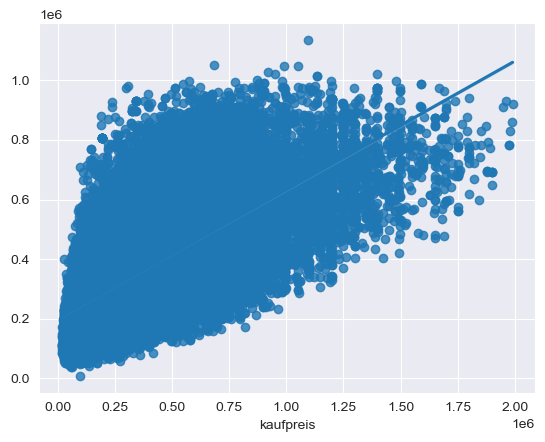

In [13]:
X = df_characteristics[['wohnflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer',
       'aufzug', 'age',
       'Objektzustand_Completely_renovated', 'Objektzustand_Dilapidated',
       'Objektzustand_First_occupancy',
       'Objektzustand_First_occupancy_after_reconstruction',
       'Objektzustand_Like_new', 'Objektzustand_Modernised',
       'Objektzustand_Needs_renovation', 'Objektzustand_Reconstructed',
       'Objektzustand_Well_kempt']]
Y = df_characteristics['kaufpreis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('Intercept:')
print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

#### Whole data set

In [14]:
housing_model = ols("""kaufpreis ~ wohnflaeche 
                                            + zimmeranzahl
                                            + schlafzimmer 
                                            + badezimmer
                                            + age
                                            + aufzug
                                            + Objektzustand_Dilapidated
                                            + Objektzustand_Needs_renovation
                                            + Objektzustand_Well_kempt
                                            + Objektzustand_Modernised
                                            + Objektzustand_Reconstructed
                                            + Objektzustand_Completely_renovated
                                            + Objektzustand_Like_new
                                            + Objektzustand_First_occupancy_after_reconstruction
                                            + Objektzustand_First_occupancy
                                            """, data=df_characteristics).fit()
housing_model_summary = housing_model.summary()
HTML(housing_model_summary.as_html())

## Macroeconomic factors only

### Merge interest rate, construction investment and household income

In [15]:
def convert_date(x):
    date_string = str(x)
    date = date_string.split('m')[-1]
    if (date == '1' or date == '2' or date == '3'):
        quarter = '1'
    elif (date == '4' or date == '5' or date == '6'):
        quarter = '2'
    elif (date == '7' or date == '8' or date == '9'):
        quarter = '3'
    elif (date == '10' or date == '11' or date == '12'):
        quarter = '4'
    else:
        quarter = '0'
    
    year = date_string.split('m')[0]
    new_date = year + '-Q' + quarter
    return new_date

df_original['date_quarter'] = df_original.apply(lambda x: convert_date(x['edat']), axis = 1)

df_original.drop(columns=['obid', 'plz', 'baujahr', 'wohnflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'objektzustand', 'edat', 'edat_year', 'aufzug', 'energieeffizienzklasse'], axis=1, inplace=True)
df_original = df_original.groupby('date_quarter', as_index=False).mean()

interest_rate = pd.read_csv('./Data/Macroeconomic Data/Interest-rate.csv')
df_interest_rate = pd.DataFrame(interest_rate)
df_original = pd.merge(df_original, df_interest_rate, how="inner", on="date_quarter")

construction_investment = pd.read_csv('./Data/Macroeconomic Data/Construction-investment.csv')
df_construction_investment = pd.DataFrame(construction_investment)
df_original = pd.merge(df_original, df_construction_investment, how="inner", on="date_quarter")

household_income = pd.read_csv('./Data/Macroeconomic Data/Household-income.csv')
df_household_income = pd.DataFrame(household_income)
df_original = pd.merge(df_original, df_household_income, how="inner", on="date_quarter")

df_original.head()

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_27427/1515922343.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_original = df_original.groupby('date_quarter', as_index=False).mean()


,date_quarter,kaufpreis,price_sqm,interest_rate,housing_construction_investment,household_income
0,2007-Q1,166689.115425,1937.025678,4.737,5.410,1584484
1,2007-Q2,162099.079184,1917.200976,4.899,5.141,1568216
2,2007-Q3,168823.541708,1955.367289,5.136,5.148,1579972
3,2007-Q4,170501.205118,1983.211385,5.034,5.133,1633608
4,2008-Q1,165769.192524,1952.292313,4.946,5.241,1626592


### Clean Unemployment and merge

In [16]:
unemployment_rate = pd.read_csv('./Data/Macroeconomic Data/Unemployment-rate.csv')
df_unemployment_rate = pd.DataFrame(unemployment_rate)

def convert_date_unemployment(x):
    date_string = str(x)
    date = date_string.split('-')[-1]
    
    if (date == 'Januar' or date == 'Februar' or date == 'März'):
        quarter = '1'
    elif (date == 'April' or date == 'Mai' or date == 'Juni'):
        quarter = '2'
    elif (date == 'Juli' or date == 'August' or date == 'September'):
        quarter = '3'
    elif (date == 'Oktober' or date == 'November' or date == 'Dezember'):
        quarter = '4'
    else:
        quarter = '0'
    year = date_string.split('-')[0]
    new_date = year + '-Q' + quarter
    return new_date

df_unemployment_rate['date_quarter'] = df_unemployment_rate.apply(lambda x: convert_date_unemployment(x['Jahr_Monat']), axis = 1)
df_unemployment_rate = df_unemployment_rate.groupby('date_quarter', as_index=False).mean()
df_unemployment_rate.drop(columns=['Erwerbspersonen', 'Erwerbstätige', 'Erwerbslose'], axis=1, inplace=True)

df_original = pd.merge(df_original, df_unemployment_rate, how="inner", on="date_quarter")

df_original.head()

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_27427/3580124936.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_unemployment_rate = df_unemployment_rate.groupby('date_quarter', as_index=False).mean()


,date_quarter,kaufpreis,price_sqm,interest_rate,housing_construction_investment,household_income,Erwerbslosenquote
0,2007-Q1,166689.115425,1937.025678,4.737,5.410,1584484,9.133333
1,2007-Q2,162099.079184,1917.200976,4.899,5.141,1568216,8.766667
2,2007-Q3,168823.541708,1955.367289,5.136,5.148,1579972,8.400000
3,2007-Q4,170501.205118,1983.211385,5.034,5.133,1633608,8.133333
4,2008-Q1,165769.192524,1952.292313,4.946,5.241,1626592,7.833333


### Clean planning permissions and merge

In [17]:
planning_permissions = pd.read_csv('./Data/Macroeconomic Data/Planning-permissions.csv')
df_planning_permissions_original = pd.DataFrame(planning_permissions)

df_planning_permissions = pd.DataFrame(np.repeat(df_planning_permissions_original.values, 4, axis=0))
df_planning_permissions.columns = df_planning_permissions_original.columns

def rowIndex(row):
    return row.name
df_planning_permissions['rowIndex'] = df_planning_permissions.apply(rowIndex, axis=1)

def add_quarter(Jahr, rowIndex):
    if (rowIndex % 4 == 0):
        quarter = 'Q1'
    elif (rowIndex % 4 == 1):
        quarter = 'Q2'
    elif (rowIndex % 4 == 2):
        quarter = 'Q3'
    elif (rowIndex % 4 == 3):
        quarter = 'Q4'
    else:
        quarter = '0'
    date_quarter = Jahr.astype(str) + '-' + quarter
    return date_quarter
df_planning_permissions['date_quarter'] = df_planning_permissions.apply(lambda x: add_quarter(x.Jahr, x.rowIndex), axis = 1)

df_planning_permissions.drop(columns=['Jahr', 'rowIndex'], axis=1, inplace=True)
df_planning_permissions['Baugenehmigungen'] = df_planning_permissions['Baugenehmigungen'].div(4)

df_original = pd.merge(df_original, df_planning_permissions, how="inner", on="date_quarter")

df_original.head()

,date_quarter,kaufpreis,price_sqm,interest_rate,housing_construction_investment,household_income,Erwerbslosenquote,Baugenehmigungen
0,2007-Q1,166689.115425,1937.025678,4.737,5.410,1584484,9.133333,45.50
1,2007-Q2,162099.079184,1917.200976,4.899,5.141,1568216,8.766667,45.50
2,2007-Q3,168823.541708,1955.367289,5.136,5.148,1579972,8.400000,45.50
3,2007-Q4,170501.205118,1983.211385,5.034,5.133,1633608,8.133333,45.50
4,2008-Q1,165769.192524,1952.292313,4.946,5.241,1626592,7.833333,43.75


### Number of transactions

In [18]:
def convert_date(x):
    date_string = str(x)
    date = date_string.split('m')[-1]
    if (date == '1' or date == '2' or date == '3'):
        quarter = '1'
    elif (date == '4' or date == '5' or date == '6'):
        quarter = '2'
    elif (date == '7' or date == '8' or date == '9'):
        quarter = '3'
    elif (date == '10' or date == '11' or date == '12'):
        quarter = '4'
    else:
        quarter = '0'
    
    year = date_string.split('m')[0]
    new_date = year + '-Q' + quarter
    return new_date

#print(df_wk_cities.head())
#print(df_wk_cities.shape)

df_wk_cities['date_quarter'] = df_wk_cities.apply(lambda x: convert_date(x['edat']), axis = 1)


df_wk_cities = df_wk_cities.groupby('date_quarter', as_index=False).count()
df_wk_cities['transactions'] = df_wk_cities['kaufpreis']
df_wk_cities.drop(columns=['obid', 'plz', 'kaufpreis', 'baujahr', 'wohnflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'parkplatz', 'objektzustand', 'edat', 'price_sqm', 'edat_year', 'aufzug', 'energieeffizienzklasse'], axis=1, inplace=True)

df_original = pd.merge(df_original, df_wk_cities, how="inner", on="date_quarter")

df_original.head() 

,date_quarter,kaufpreis,price_sqm,interest_rate,housing_construction_investment,household_income,Erwerbslosenquote,Baugenehmigungen,transactions
0,2007-Q1,166689.115425,1937.025678,4.737,5.410,1584484,9.133333,45.50,14073
1,2007-Q2,162099.079184,1917.200976,4.899,5.141,1568216,8.766667,45.50,15006
2,2007-Q3,168823.541708,1955.367289,5.136,5.148,1579972,8.400000,45.50,14921
3,2007-Q4,170501.205118,1983.211385,5.034,5.133,1633608,8.133333,45.50,14074
4,2008-Q1,165769.192524,1952.292313,4.946,5.241,1626592,7.833333,43.75,14622


### Regression analysis Macroeconomic factors only

#### Train and test dataset

(49, 6)
(13, 6)
(49,)
(13,)
                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     508.5
Date:                Thu, 20 Apr 2023   Prob (F-statistic):           1.52e-37
Time:                        23:45:26   Log-Likelihood:                -524.82
No. Observations:                  49   AIC:                             1064.
Df Residuals:                      42   BIC:                             1077.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

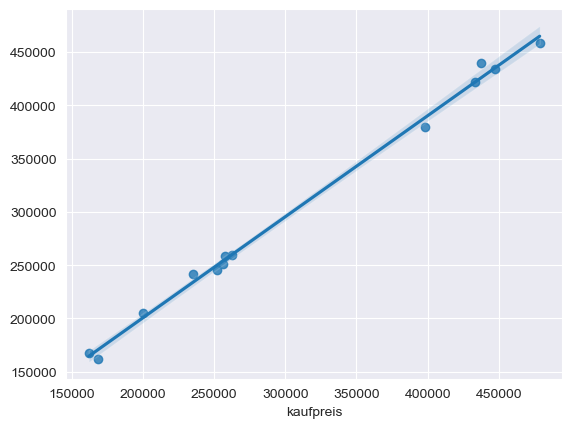

In [19]:
X = df_original[['interest_rate', 'Erwerbslosenquote', 'household_income', 'housing_construction_investment', 'Baugenehmigungen', 'transactions']]
Y = df_original['kaufpreis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)
sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

#### Whole data set

In [20]:
housing_model = ols("""kaufpreis ~ interest_rate 
                                            + Erwerbslosenquote
                                            + household_income
                                            + housing_construction_investment
                                            + Baugenehmigungen
                                            +transactions""", data=df_original).fit()

housing_model_summary = housing_model.summary()
HTML(housing_model_summary.as_html())

In [21]:
#fig = plt.figure(figsize=(20,12))
#fig = sm.graphics.plot_partregress_grid(housing_model, fig=fig)

## Characteristics and Macroeconomic factors combined

### Merge of characteristics and macroeconomic factors dataset

In [22]:
df_both_factors = df_characteristics.copy(deep=True)

def convert_date(x):
    date_string = str(x)
    date = date_string.split('m')[-1]
    if (date == '1' or date == '2' or date == '3'):
        quarter = '1'
    elif (date == '4' or date == '5' or date == '6'):
        quarter = '2'
    elif (date == '7' or date == '8' or date == '9'):
        quarter = '3'
    elif (date == '10' or date == '11' or date == '12'):
        quarter = '4'
    else:
        quarter = '0'
    
    year = date_string.split('m')[0]
    new_date = year + '-Q' + quarter
    return new_date

df_both_factors['date_quarter'] = df_both_factors.apply(lambda x: convert_date(x['edat']), axis = 1)

df_original.drop(columns=['kaufpreis', 'price_sqm'], axis=1, inplace=True)
df_both_factors = pd.merge(df_both_factors, df_original, how="left", on="date_quarter")
df_both_factors = df_both_factors.dropna(subset=['household_income'])

print(df_both_factors.shape)
df_both_factors.head()


(347575, 31)


,obid,plz,kaufpreis,baujahr,wohnflaeche,zimmeranzahl,schlafzimmer,badezimmer,aufzug,parkplatz,...,Objektzustand_Needs_renovation,Objektzustand_Reconstructed,Objektzustand_Well_kempt,date_quarter,interest_rate,housing_construction_investment,household_income,Erwerbslosenquote,Baugenehmigungen,transactions
0,43723127,22145,77000.0,1970.0,45.0,2.0,1,1,1,Yes,...,0,0,0,2007-Q4,5.034,5.133,1633608.0,8.133333,45.5,14074.0
1,41261600,22119,95000.0,1960.0,34.0,2.0,1,1,1,Yes,...,0,0,0,2007-Q2,4.899,5.141,1568216.0,8.766667,45.5,15006.0
2,41801997,22529,195000.0,2008.0,107.0,3.0,2,1,0,Yes,...,0,0,0,2007-Q3,5.136,5.148,1579972.0,8.400000,45.5,14921.0
3,40446111,22761,159000.0,1999.0,71.0,2.0,1,1,1,Other missing,...,0,0,1,2007-Q1,4.737,5.410,1584484.0,9.133333,45.5,14073.0
4,39978694,22359,272100.0,2006.0,95.0,3.0,2,1,1,Yes,...,0,0,0,2007-Q1,4.737,5.410,1584484.0,9.133333,45.5,14073.0


### Regression on house characteristics and macroeconomic factors

#### Trest and train data set

(278060, 21)
(69515, 21)
(278060,)
(69515,)
                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                 2.456e+04
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:45:46   Log-Likelihood:            -3.7088e+06
No. Observations:              278060   AIC:                         7.418e+06
Df Residuals:                  278039   BIC:                         7.418e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

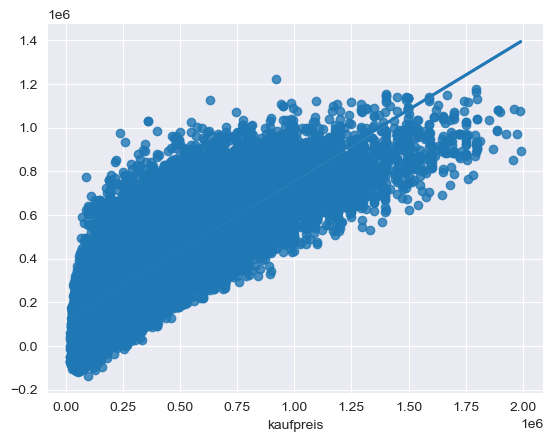

In [23]:
X = df_both_factors[['interest_rate', 'Erwerbslosenquote', 'household_income', 'housing_construction_investment', 'Baugenehmigungen', 'transactions', 'wohnflaeche',
       'zimmeranzahl', 'schlafzimmer', 'badezimmer',
       'aufzug', 'age',
       'Objektzustand_Completely_renovated', 'Objektzustand_Dilapidated',
       'Objektzustand_First_occupancy',
       'Objektzustand_First_occupancy_after_reconstruction',
       'Objektzustand_Like_new', 'Objektzustand_Modernised',
       'Objektzustand_Needs_renovation', 'Objektzustand_Reconstructed',
       'Objektzustand_Well_kempt']]
Y = df_both_factors['kaufpreis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)
sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

In [24]:
housing_model = ols("""kaufpreis ~ interest_rate 
                                            + Erwerbslosenquote
                                            + household_income
                                            + housing_construction_investment
                                            + Baugenehmigungen
                                            + transactions
                                            + wohnflaeche
                                            + zimmeranzahl
                                            + schlafzimmer 
                                            + badezimmer
                                            + age
                                            + aufzug
                                            + Objektzustand_Dilapidated
                                            + Objektzustand_Needs_renovation
                                            + Objektzustand_Well_kempt
                                            + Objektzustand_Modernised
                                            + Objektzustand_Reconstructed
                                            + Objektzustand_Completely_renovated
                                            + Objektzustand_Like_new
                                            + Objektzustand_First_occupancy_after_reconstruction
                                            + Objektzustand_First_occupancy
                                            """, data=df_both_factors).fit()

housing_model_summary = housing_model.summary()
HTML(housing_model_summary.as_html())